<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Stock_Market_Prediction%20(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
import matplotlib.pyplot as plt

# # Load the data
# df1 = pd.read_csv("dow_jones_index.data")

# # Select columns
# df = df1[['open', 'high', 'low', 'close']]

# load data
df = pd.read_csv("data2.csv")


In [ ]:
df.shape

(536, 8)

In [ ]:
df.head()

,SP500,DAX,FTSE,NIKKEI,BOVESPA,EU,MSCI,ISE
0,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,0.038376
1,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,0.031813
2,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,-0.026353
3,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,-0.084716
4,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,0.009658


In [ ]:
# # remove the dollar sign from all columns
# df = df.replace({'\$': ''}, regex=True)

# # display the modified DataFrame
# print(df)

In [ ]:
# # save the DataFrame to a CSV file
# df.to_csv('data3.csv', index=False)

**Remove outliers**

Z-score method: This method is based on the standard deviation of the data. Any data point that is outside a certain number of standard deviations from the mean is considered an outlier. You can use the scipy.stats.zscore function to calculate the z-scores of the data and remove any row with a z-score above a certain threshold.

In [ ]:
# from scipy.stats import zscore

# # Calculate z-scores of the dataframe
# z_scores = zscore(df)

# # Identify rows with z-scores above a certain threshold (e.g. 3)
# threshold = 3
# outliers = (abs(z_scores) > threshold).any(axis=1)

# # Remove outliers from the dataframe
# df = df[~outliers]

Interquartile range (IQR) method: This method is based on the distribution of the data. The IQR is the difference between the third quartile and the first quartile of the data. Any data point that is outside a certain range (e.g. 1.5 times the IQR) from the median is considered an outlier. You can use the numpy.percentile function to calculate the quartiles of the data and remove any row with a value outside the IQR range.

In [ ]:
# import numpy as np

# # Calculate quartiles of the dataframe
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # Identify rows with values outside the IQR range
# threshold = 1.5
# outliers = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)

# # Remove outliers from the dataframe
# df = df[~outliers]

In [ ]:
column_names = df.columns
print(column_names)

Index(['SP500', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'MSCI', 'ISE'], dtype='object')


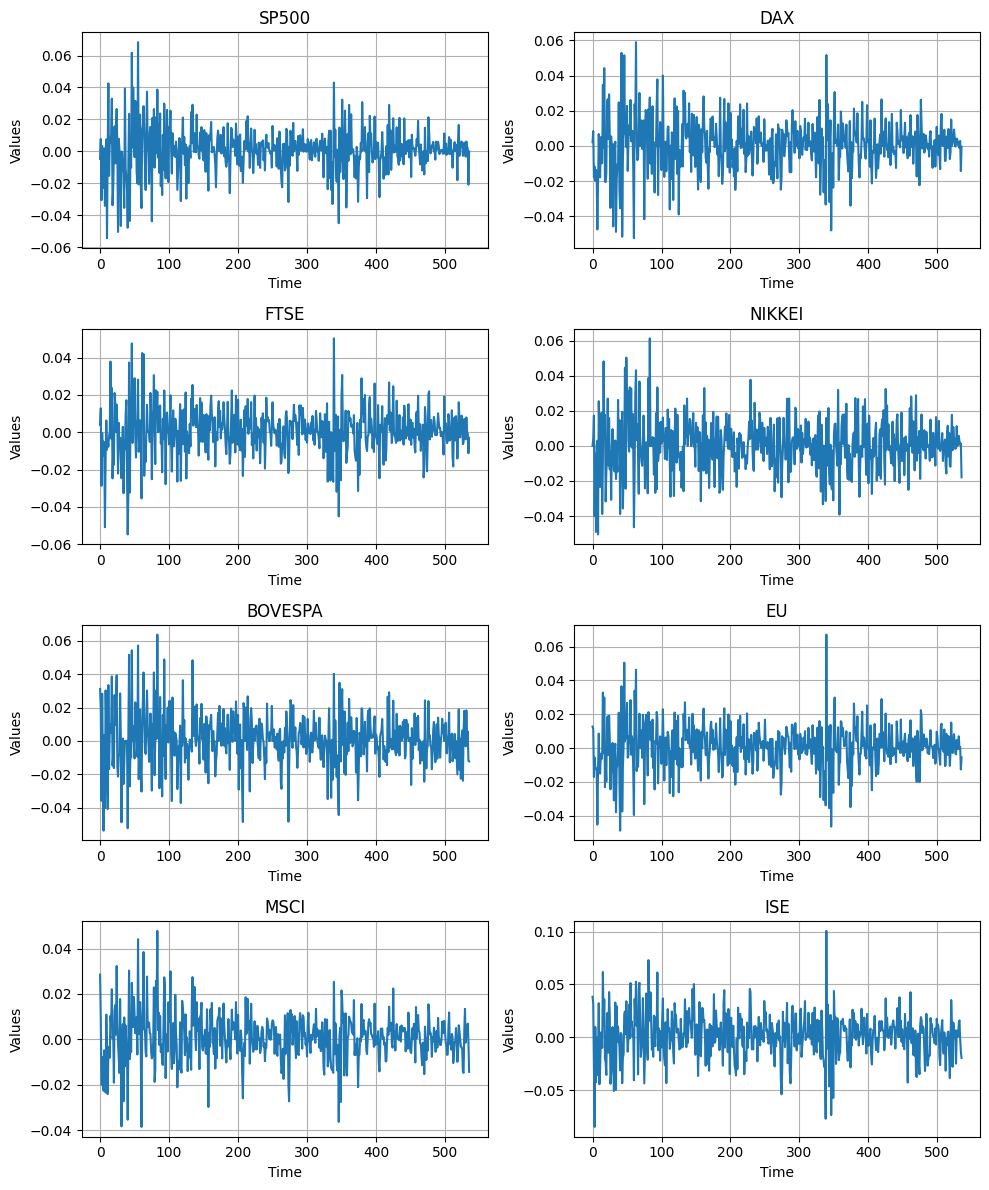

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))

# plot each column on a separate subplot
for i, col in enumerate(df.columns):
    axs[i//2, i%2].plot(df[col])
    axs[i//2, i%2].set_title(col)
    axs[i//2, i%2].set_xlabel('Time')
    axs[i//2, i%2].set_ylabel('Values')
    axs[i//2, i%2].grid(True)  # add grid to subplot

# adjust subplot spacing
plt.tight_layout()

# display plot
plt.show()

# save the input and output data
plt.savefig('In_Out_Data.png')


**Drawing the heatmap**

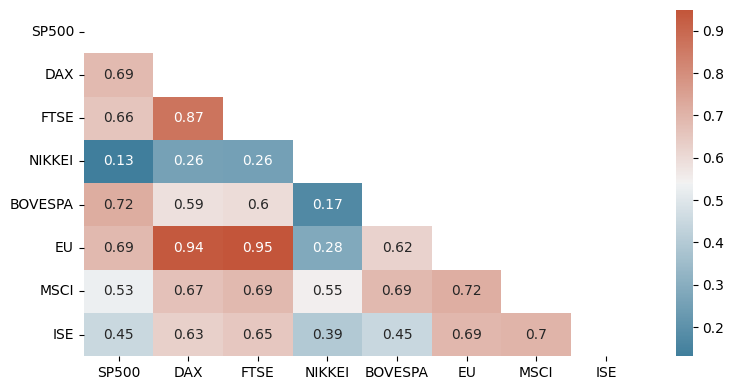

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
# df = pd.read_csv('my_data2.csv')

# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(8, 4))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap)

plt.tight_layout()
plt.savefig('Heatmap.png')


**Correlation between different variables**

In [ ]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()

# get absolute correlation coefficients and sort in descending order
abs_corr = corr.abs().sort_values(by='ISE', ascending=False)

# display the rank of features based on correlation coefficients
rank = abs_corr['ISE'].rank(ascending=False).astype(int)
print('Rank of features based on correlation coefficients:\n', rank)

Rank of features based on correlation coefficients:
 ISE        1
MSCI       2
EU         3
FTSE       4
DAX        5
SP500      6
BOVESPA    7
NIKKEI     8
Name: ISE, dtype: int64


**Data spliting**

In [ ]:
# Split data into training and testing sets
X = df.drop('ISE', axis=1).values
y = df['ISE'].values
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**Select best features**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

#======================================
# Apply feature selection using SelectKBest and F-test
# We apply feature selection using SelectKBest and F-test, which selects the top 5 features based on their importance. 
selector  = SelectKBest(f_classif, k=7)
#======================================

X_train    = selector.fit_transform(X_Train, y_train)
X_test     = selector.transform(X_Test)

y_train = y_train
y_test  = y_test

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


In [ ]:
X_train.shape

(482, 7)

In [ ]:
X_test.shape

(54, 7)

In [ ]:
import matplotlib.pyplot as plt

def plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred, y_test, y_test_pred, filename):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # subplot 1: actual and estimated responses for training cases
    axs[0].plot(y_train, label='Actual')
    axs[0].plot(y_train_pred, label='Predicted')
    axs[0].set_title('Training Case')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend()
    axs[0].grid()

    # subplot 2: actual and estimated responses for testing cases
    axs[1].plot(y_test, label='Actual y_test')
    axs[1].plot(y_test_pred, label='Estimated y_test_pred')
    axs[1].set_title('Testing Case')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Amplitude')
    axs[1].legend()
    axs[1].grid()

    # adjust subplot spacing
    plt.tight_layout()

    # Save the figure
    fig.savefig(filename)

    # display plot
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_two_responses(y_train, y_train_pred, filename, label):
    
    # Assuming y_train and y_train_pred are numpy arrays
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # Plot actual vs predicted response
    ax1.plot(y_train)
    ax1.plot(y_train_pred)
    # ax1.set_xlabel('Training Examples')
    ax1.set_ylabel('Response')
    ax1.set_title(label)
    ax1.legend()
    ax1.grid()

    # Plot error over time
    errors = y_train - y_train_pred.flatten()
    ax2.plot(errors, label='Error')
    # ax2.set_xlabel('Training Examples')
    ax2.set_ylabel('Error')
    # ax2.set_title('Error vs. Training Examples (Training Set)')
    ax2.legend()
    ax2.grid()

    # adjust subplot spacing
    plt.tight_layout()

    plt.show()
    # Save the figure
    fig.savefig(filename)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

def plot_actual_vs_predicted(name, y_train, y_train_pred, y_test, y_test_pred):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))

    ax1.scatter(y_train, y_train_pred, label='Training')
    ax1.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
    ax1.set_xlabel('Actual')
    ax1.set_ylabel('Predicted')
    ax1.set_title(f'Training Set (R-Square: {round(r2_score(y_train, y_train_pred), 3)})')
    ax1.grid(True)

    ax2.scatter(y_test, y_test_pred, label='Testing')
    ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
    ax2.set_xlabel('Actual')
    ax2.set_ylabel('Predicted')
    ax2.set_title(f'Testing Set (R-Square: {round(r2_score(y_test, y_test_pred), 3)})')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Save the figure with the specified filename
    fig.savefig(f'{name}.png')

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(model, X_train, y_train, X_test, y_test):

    # Calculate predictions for both training and testing datasets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the MSE, R-squared, MAE, VAF, and RMSE for both training and testing datasets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae  = mean_absolute_error(y_test, y_test_pred)

    train_rmse = sqrt(train_mse)
    test_rmse = sqrt(test_mse)

    # Store results in a pandas dataframe with a title
    results = pd.DataFrame(data=np.array([[train_mse, train_mae, train_rmse],
                                          [test_mse, test_mae, test_rmse]]),
                          index=['Training Set', 'Testing Set'],
                          columns=['MSE', 'MAE', 'RMSE'])

    # Print results
    print(results)
    
    return results

In [ ]:
X_train.shape

(482, 7)

**Linear Regression**

In [ ]:
                                                                                                                                                       from sklearn.linear_model import LinearRegression
# Train the linear regression model
LinearR = LinearRegression()
LinearR.fit(X_train, y_train)

# Evaluate the model on the testing set
score = LinearR.score(X_test, y_test)
print('R-squared score:', score)

# Predict output for training and testing sets
y_train_pred = LinearR.predict(X_train)
y_test_pred = LinearR.predict(X_test)


R-squared score: 0.6493688730954392


In [ ]:
evaluate_model(LinearR, X_train, y_train, X_test, y_test)

                   MSE       MAE      RMSE
Training Set  0.000183  0.010325  0.013522
Testing Set   0.000211  0.010998  0.014516


,MSE,MAE,RMSE
Training Set,0.000183,0.010325,0.013522
Testing Set,0.000211,0.010998,0.014516


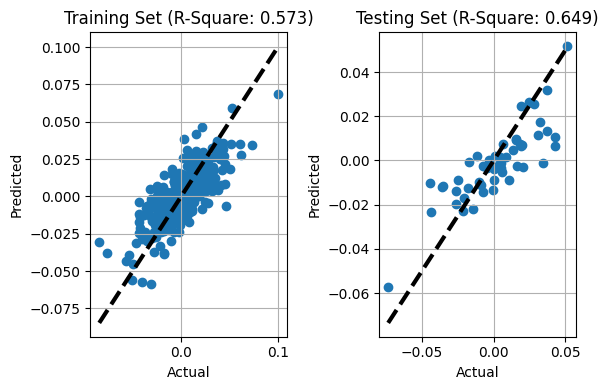

In [ ]:
plot_actual_vs_predicted('Correlation_LR', y_train, y_train_pred, y_test, y_test_pred)

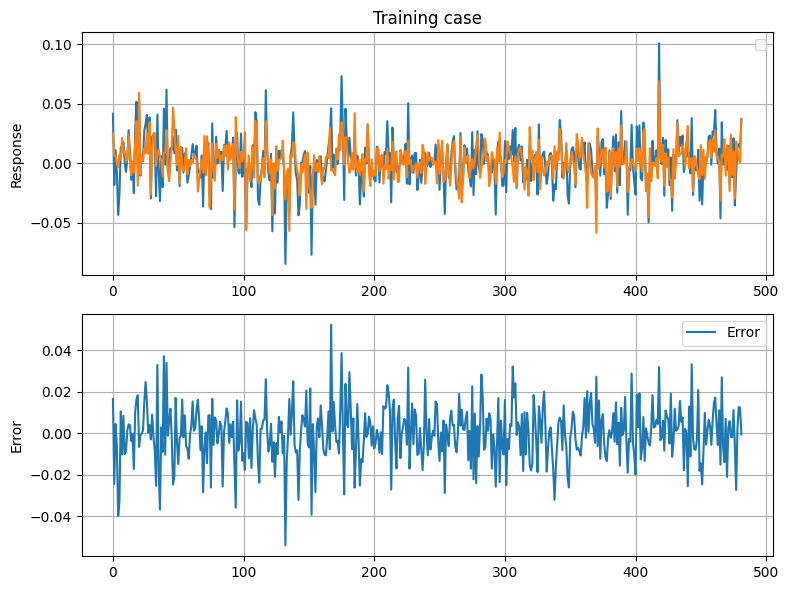

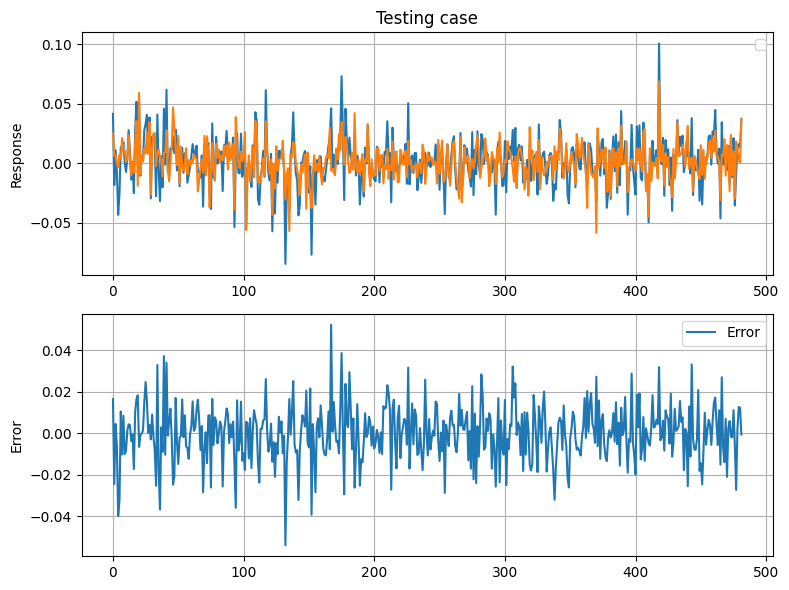

In [ ]:
plot_two_responses(y_train, y_train_pred, 'LR_training', 'Training case')
plot_two_responses(y_train, y_train_pred, 'LR_testing', 'Testing case')

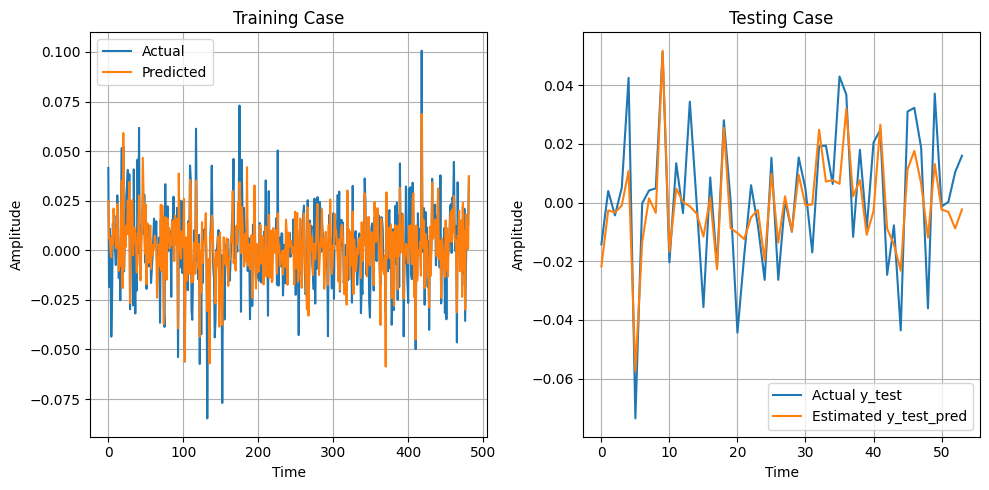

In [ ]:
plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred, y_test, y_test_pred, 'Actual_Estimated_SS_LR.png')

**LSTM Model**

Epoch 1/100
16/16 - 3s - loss: 4.5313e-04 - val_loss: 5.7914e-04 - 3s/epoch - 189ms/step
Epoch 2/100
16/16 - 0s - loss: 3.7452e-04 - val_loss: 4.3455e-04 - 134ms/epoch - 8ms/step
Epoch 3/100
16/16 - 0s - loss: 3.0070e-04 - val_loss: 3.4157e-04 - 177ms/epoch - 11ms/step
Epoch 4/100
16/16 - 0s - loss: 2.6059e-04 - val_loss: 2.9421e-04 - 140ms/epoch - 9ms/step
Epoch 5/100
16/16 - 0s - loss: 2.8082e-04 - val_loss: 2.4049e-04 - 156ms/epoch - 10ms/step
Epoch 6/100
16/16 - 0s - loss: 2.7059e-04 - val_loss: 2.6113e-04 - 150ms/epoch - 9ms/step
Epoch 7/100
16/16 - 0s - loss: 2.3877e-04 - val_loss: 2.4414e-04 - 147ms/epoch - 9ms/step
Epoch 8/100
16/16 - 0s - loss: 2.3934e-04 - val_loss: 2.2382e-04 - 147ms/epoch - 9ms/step
Epoch 9/100
16/16 - 0s - loss: 2.4799e-04 - val_loss: 2.4575e-04 - 137ms/epoch - 9ms/step
Epoch 10/100
16/16 - 0s - loss: 2.4090e-04 - val_loss: 2.3606e-04 - 147ms/epoch - 9ms/step
Epoch 11/100
16/16 - 0s - loss: 2.4437e-04 - val_loss: 2.3116e-04 - 154ms/epoch - 10ms/step
Epoch 

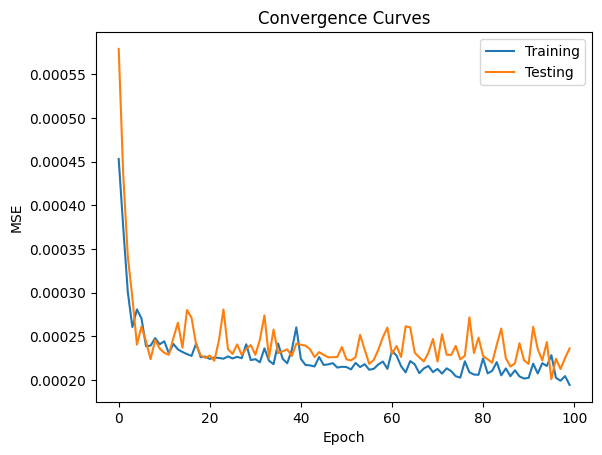

2/2 [==============================] - 0s 7ms/step


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Reshape X_train and X_test to be 3D
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=2)

# Plot the convergence curves
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Testing')
plt.title('Convergence Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Evaluate the model on the training set
y_pred_train = model.predict(X_train_reshaped)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = np.mean(np.abs(y_train - y_pred_train))
rmse_train = np.sqrt(mse_train)

# Evaluate the model on the test set
y_pred_test = model.predict(X_test_reshaped)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = np.mean(np.abs(y_test - y_pred_test))
rmse_test = np.sqrt(mse_test)


In [ ]:
print('LSTM Training set: MSE: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}'.format(mse_train, mae_train, rmse_train))
print('LSTM Testing set: MSE: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}'.format(mse_test, mae_test, rmse_test))

LSTM Training set: MSE: 0.000, MAE: 0.020, RMSE: 0.014
LSTM Testing set: MSE: 0.000, MAE: 0.024, RMSE: 0.015


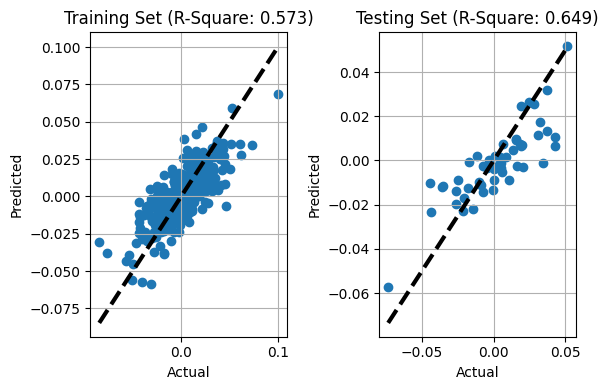

In [ ]:
plot_actual_vs_predicted('Correlation_LSTM', y_train, y_train_pred, y_test, y_test_pred)

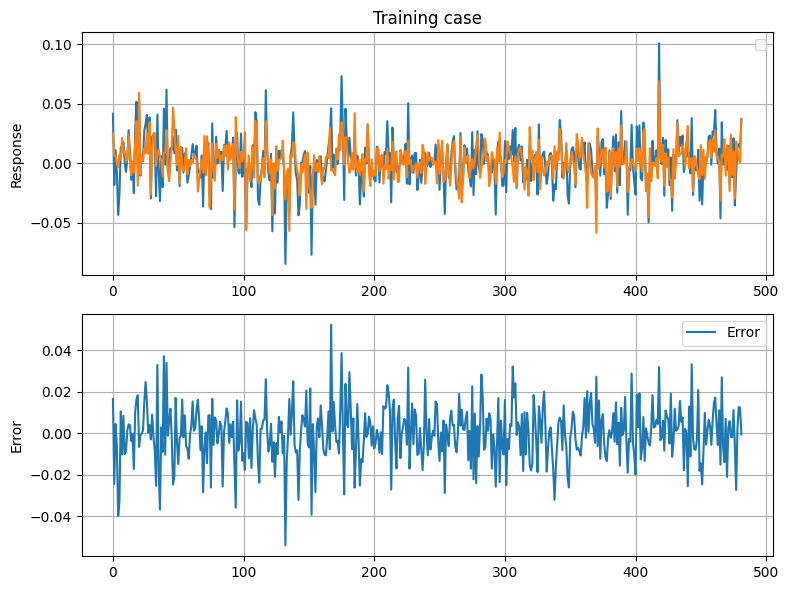

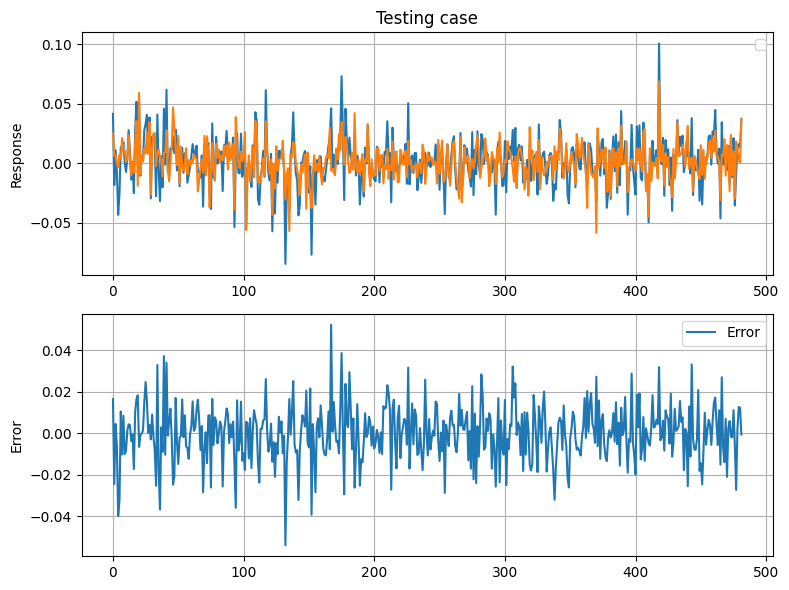

In [ ]:
plot_two_responses(y_train, y_train_pred, 'LR_training', 'Training case')
plot_two_responses(y_train, y_train_pred, 'LR_testing', 'Testing case')

**Deep Learning**

2/2 [==============================] - 0s 5ms/step
Model 1 (1 layers):
MSE: 0.0002
MAE: 0.0109
RMSE: 0.0148
Model 2 (2 layers):
MSE: 0.0002
MAE: 0.0109
RMSE: 0.0144
Model 3 (3 layers):
MSE: 0.0002
MAE: 0.0108
RMSE: 0.0148
Model 4 (4 layers):
MSE: 0.0002
MAE: 0.0111
RMSE: 0.0151


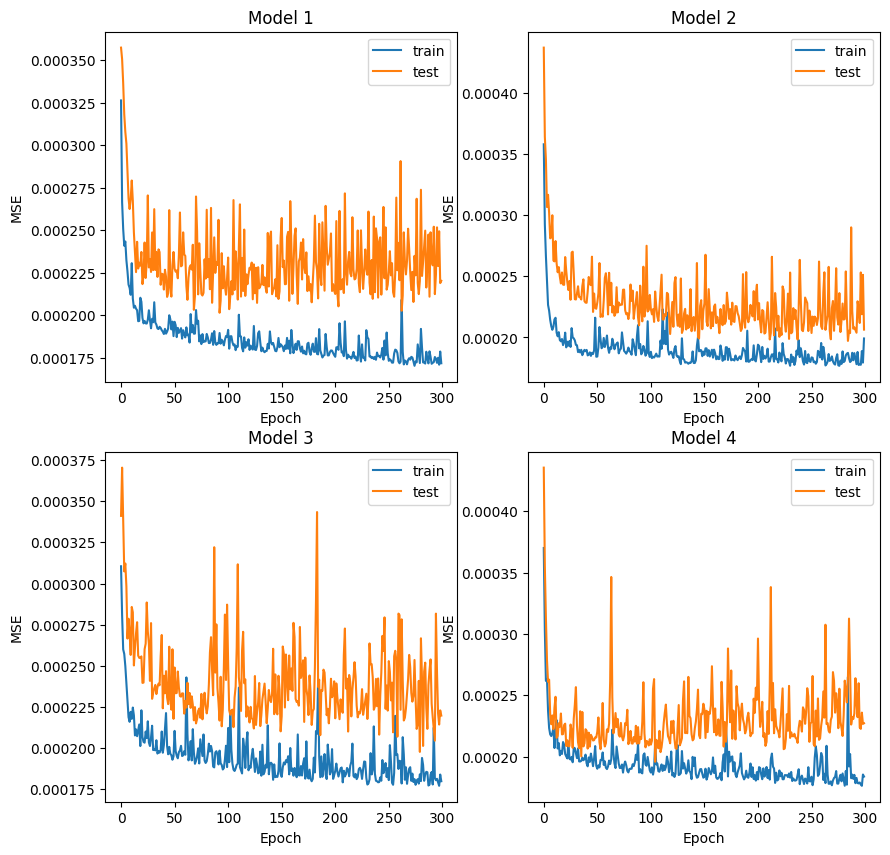

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define layer sizes
layer_sizes = [[7], [7, 7], [7, 7, 7], [7, 7, 7, 7]]

# Define lists to store metrics and histories for each model
mse_list = []
mae_list = []
rmse_list = []
history_list = []

# Train each model and store metrics and histories
for layers in layer_sizes:
    model = Sequential()
    for i, layer_size in enumerate(layers):
        if i == 0:
            model.add(Dense(layer_size, input_dim=X_train.shape[1], activation='relu'))
        else:
            model.add(Dense(layer_size, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    history_list.append(history)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)

# Plot convergence curves in a subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()
for i, history in enumerate(history_list):
    axs[i].plot(history.history['loss'], label='train')
    axs[i].plot(history.history['val_loss'], label='test')
    axs[i].set_title(f'Model {i+1}')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MSE')
    axs[i].legend()

# Print metrics for each model
for i, layers in enumerate(layer_sizes):
    print(f'Model {i+1} ({len(layers)} layers):')
    print(f'MSE: {mse_list[i]:.4f}')
    print(f'MAE: {mae_list[i]:.4f}')
    print(f'RMSE: {rmse_list[i]:.4f}')


In [ ]:
# from keras import regularizers

# HL1 = 7
# HL2 = 15

# # Define the model architecture with L2 regularization
# DL_model = Sequential()
# DL_model.add(Dense(HL1, input_dim=X_train.shape[1], activation='relu'))
# DL_model.add(Dense(HL2, activation='relu'))
# DL_model.add(Dense(1, activation='linear'))

# # Compile the model
# DL_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# # Train the model with validation data
# history = DL_model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
# Predict at training and testing cases
y_train_pred2 = DL_model.predict(X_train)
y_test_pred2 = DL_model.predict(X_test)

InvalidArgumentError: ignored

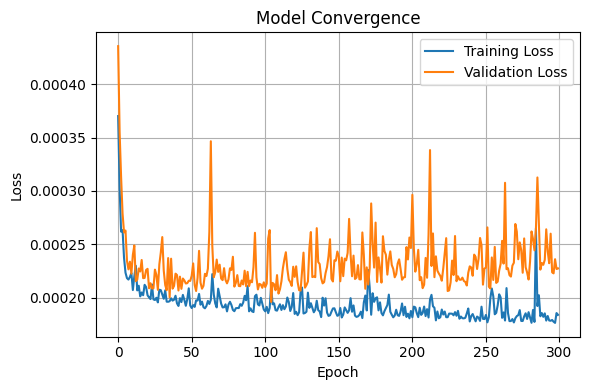

In [ ]:
# Plot the convergence curve for training and validation
fig = plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Convergence')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.tight_layout()
plt.grid(True) 
plt.legend()
plt.show()
fig.savefig('CNN_convergence.png')

In [ ]:
evaluate_model(DL_model, X_train, y_train, X_test, y_test)

InvalidArgumentError: ignored

ValueError: ignored

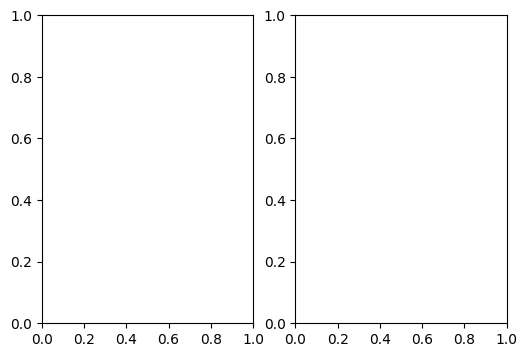

In [ ]:
plot_actual_vs_predicted('Correlation_DL', y_train, y_train_pred2, y_test, y_test_pred2)

ValueError: ignored

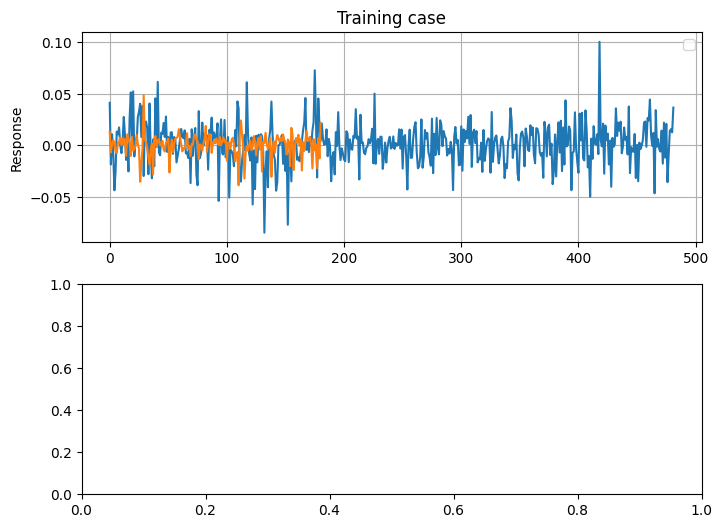

In [ ]:
plot_two_responses(y_train, y_train_pred2, 'DL_training.png', 'Training case')
plot_two_responses(y_train, y_train_pred2, 'DL_testing.png', 'Testing case')

In [ ]:
plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred2, y_test, y_test_pred2, 'Actual_Estimated_SS_DL.png')

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_shape = X_train.shape[1]

# Define the model architecture
inputs = Input(shape=(input_shape,))
x = Dense(HL1, activation='relu')(inputs)
x = Dense(HL2, activation='relu')(x)
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
# Save the model
model.save('CNN_model_Turkey_2.h5')

In [ ]:
# # Load the saved model
# loaded_model = load_model('CNN_model_Turkey.h5')